<a href="https://colab.research.google.com/github/emamanni/AnalisiDeiDati24-25/blob/main/13_RegressioneLineare_OLS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisi di regressione: determinare il vettore $\mathbf{w}$ con il metodo dei minimi quadrati

In questo notebook si determinerà il valore ottimale del vettore di pesi $\mathbf{w}$  per definire un modello di regressione lineare, utilizzando il metodo dei minimi quadrati (Ordinary Least Squares, OLS).

L'analisi sarà condotta su un dataset, denominato sales_vs_ads.csv, contenente i dati su spesa in spot televisivi (attributo x1), spesa in spot sui giornali (attributo x2) e dati relativi alle vendite (attributo y). x1 e x2 saranno le variabili esplicative e y sarà la variabile target.

In [1]:
# "Montiamo" il drive per poter accedere al file
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

import os

# Percorso alla directory che contiene i file da utilizzare
# Percorso da modificare in base alla propria macchina
folder_path = '/content/drive/MyDrive/Colab Notebooks/Notebook Corso Analisi dei Dati/FileDiSupporto'

Mounted at /content/drive


In [2]:
file_path_csv = os.path.join(folder_path, 'sales_vs_ads.csv')

import pandas as pd

# leggiamo il dataset
data = pd.read_csv(file_path_csv, header=0)

In [10]:
# estraiamo le colonne delle variabili esplicative, della variabile target e il numero di osservazioni
X = data[['x1', 'x2']].values
y = data['y'].values
m = len(y)
print("Variabili esplicative:\n", X, "\n")
print("Variabile target:\n", y, "\n")
print("Numero di osservazioni:", m)

Variabili esplicative:
 [[ 2.96  4.45]
 [ 5.25  0.64]
 [ 0.9   5.01]
 [ 6.77  5.07]
 [ 5.72  3.27]
 [ 5.69  6.01]
 [11.76  6.45]
 [ 6.03  6.81]
 [ 6.02  7.19]
 [ 6.06 13.26]
 [18.46  7.94]
 [ 6.52 21.38]
 [ 6.58  8.64]
 [ 8.51 11.73]
 [ 6.89  9.33]
 [ 6.63  9.71]
 [ 6.9   8.3 ]
 [ 6.69 10.4 ]
 [ 7.38 10.79]
 [ 7.5  10.93]] 

Variabile target:
 [ 371.88  484.55   85.47  613.85  531.31  628.3  1167.89  626.87  724.01
  817.08 1325.71 1064.86  802.38  934.75  774.84  920.35  835.48  755.61
  814.83  826.21] 

Numero di osservazioni: 20


## Metodo dei minimi quadrati

Nel metodo dei minimi quadrati si sceglie il vettore $\mathbf{w}$ che minimizza la somma degli errori quadratici (Sum of Squared Errors, SSE)::

$$
\min_{\mathbf{w}} \mathrm{SSE} = \sum_{i=1}^{m} e_i^2 = \mathbf{e}^T \mathbf{e}.
$$

Esprimendo gli errori come $\mathbf{e} = \mathbf{y} - \mathbf{X} \mathbf{w}$ ed esplicitando l'espressione $\mathbf{e}^T \mathbf{e}$ , la quantità SSE  può essere scritta come:

$$
\mathrm{SSE} = \mathbf{y}^T\mathbf{y} - 2 \mathbf{y}^T\mathbf{X}\mathbf{w} + \mathbf{w}^T\mathbf{X}^T\mathbf{X}\mathbf{w}.
$$

Il vettore $\mathbf{w}^*$ che minimizza SSE si ottiene uguagliando a 0 il suo gradiente, ovvero risolvendo le equazioni normali:

$$
\mathbf{X}^T\mathbf{X}\mathbf{w} = \mathbf{X}^T\mathbf{y}.
$$

Se $\mathbf{X}^T\mathbf{X}$ è non singolare:

$$
\mathbf{w}^* = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}.
$$

### Risoluzione con NumPy

Di seguito, il vettore $\mathbf{w}^*$ è ottenuto con il metodo dei minimi quadrati utilizzando la libreria NumPy.

In [27]:
import numpy as np

# crea un array con m 1
ones = np.ones(m)
# Trasforma ones in un array colonna (matrice m x 1), per poterlo concatenare
# orizzontalmente ad altre colonne
ones = ones.reshape(m,1)

# Costruisce la matrice X aumentata concatenando:
# la colonna di 1 (per il termine noto),
# la matrice X originaria composta dalle colonne x1 e x2
# axis=1 concatena per colonne
X_mod = np.concatenate((ones, X), axis=1)

# risoluzione con np.linalg.lstsq
w, SSE = np.linalg.lstsq(X_mod, y)[0:2]

print('I parametri ottenuti con il metodo OLS (utilizzando np.linalg.lstsq) sono:', w)
print('Il valore di SSE è:', SSE)

I parametri ottenuti con il metodo OLS (utilizzando np.linalg.lstsq) sono: [85.25180493 64.09398845 26.76486062]
Il valore di SSE è: [132073.17200989]


In [30]:
print(X_mod)

print(np.transpose(X_mod))

A = np.dot(np.transpose(X_mod), X_mod)
print(A)

[[ 1.    2.96  4.45]
 [ 1.    5.25  0.64]
 [ 1.    0.9   5.01]
 [ 1.    6.77  5.07]
 [ 1.    5.72  3.27]
 [ 1.    5.69  6.01]
 [ 1.   11.76  6.45]
 [ 1.    6.03  6.81]
 [ 1.    6.02  7.19]
 [ 1.    6.06 13.26]
 [ 1.   18.46  7.94]
 [ 1.    6.52 21.38]
 [ 1.    6.58  8.64]
 [ 1.    8.51 11.73]
 [ 1.    6.89  9.33]
 [ 1.    6.63  9.71]
 [ 1.    6.9   8.3 ]
 [ 1.    6.69 10.4 ]
 [ 1.    7.38 10.79]
 [ 1.    7.5  10.93]]
[[ 1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.    1.
   1.    1.    1.    1.    1.    1.    1.    1.  ]
 [ 2.96  5.25  0.9   6.77  5.72  5.69 11.76  6.03  6.02  6.06 18.46  6.52
   6.58  8.51  6.89  6.63  6.9   6.69  7.38  7.5 ]
 [ 4.45  0.64  5.01  5.07  3.27  6.01  6.45  6.81  7.19 13.26  7.94 21.38
   8.64 11.73  9.33  9.71  8.3  10.4  10.79 10.93]]
[[  20.      139.22    167.31  ]
 [ 139.22   1189.192  1208.5776]
 [ 167.31   1208.5776 1759.9949]]


### Risoluzione con le equazioni normali

Di seguito, il vettore $\mathbf{w}^*$ è ottenuto con il metodo dei minimi quadrati risolvendo direttamente le equazioni normali.

In [26]:
# risoluzione con le equazioni normali
w_eq_norm = np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(X_mod),X_mod)), np.transpose(X_mod)), y)

print('I parametri ottenuti con il metodo OLS (risolvendo le equazioni normali) sono:', w_eq_norm)

I parametri ottenuti con il metodo OLS (risolvendo le equazioni normali) sono: [85.25180493 64.09398845 26.76486062]


In [23]:
def stampa_errori(X, y, w0, w1, w2):

  errore_medio = 0
  for i in range(m):
    x1_i, x2_i = X[i, 0], X[i, 1]
    y_real = y[i]
    y_hat = w0 + w1 * x1_i + w2 * x2_i
    errore = y_real - y_hat
    errore_medio += errore
    print("Osservazione ", i, "- valore osservato  ", y_real, "- valore previsto ",
          y_hat, "- errore ", errore)
  print("Errore medio:", errore_medio/m)

In [24]:
stampa_errori(X, y, w_eq_norm[0], w_eq_norm[1], w_eq_norm[2])

Osservazione  0 - valore osservato   371.88 - valore previsto  394.07364047805964 - errore  -22.19364047805965
Osservazione  1 - valore osservato   484.55 - valore previsto  438.874755060932 - errore  45.67524493906802
Osservazione  2 - valore osservato   85.47 - valore previsto  277.0283462271119 - errore  -191.5583462271119
Osservazione  3 - valore osservato   613.85 - valore previsto  654.8659500382947 - errore  -41.015950038294704
Osservazione  4 - valore osservato   531.31 - valore previsto  539.3905130571941 - errore  -8.080513057194139
Osservazione  5 - valore osservato   628.3 - valore previsto  610.8034114988409 - errore  17.496588501159067
Osservazione  6 - valore osservato   1167.89 - valore previsto  1011.630460034163 - errore  156.25953996583712
Osservazione  7 - valore osservato   626.87 - valore previsto  654.0072560651442 - errore  -27.137256065144243
Osservazione  8 - valore osservato   724.01 - valore previsto  663.5369632157649 - errore  60.47303678423509
Osservazion

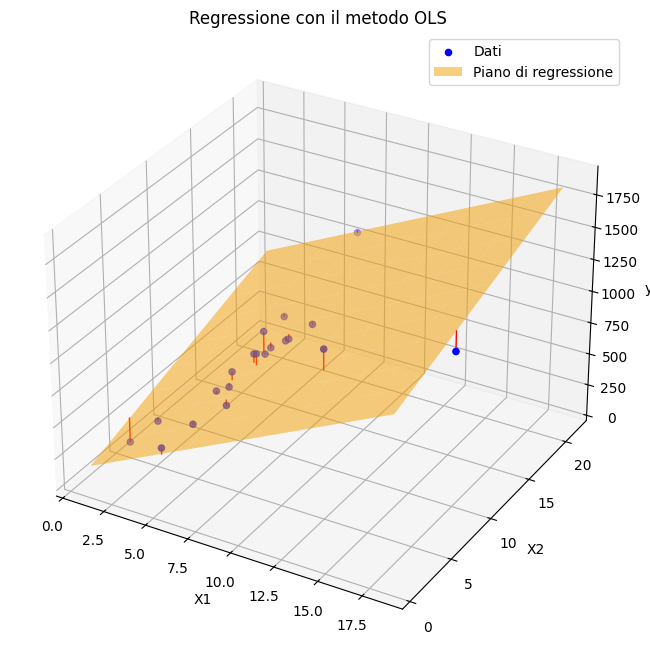

In [25]:
import matplotlib.pyplot as plt

# Recuperiamo i valori ottimali per w
w0_opt = w_eq_norm[0]
w1_opt = w_eq_norm[1]
w2_opt = w_eq_norm[2]

# Rappresentiamo graficamente la soluzione
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(projection='3d')

# Rappresentiamo graficamente i dati osservati
ax.scatter(X[:, 0], X[:, 1], y, color='blue', label='Dati')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('y')
ax.set_title("Regressione con il metodo OLS")

# Rappresentiamo graficamente il piano di regressione
X1, X2 = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 10),
                     np.linspace(X[:, 1].min(), X[:, 1].max(), 10))
y_pred = w0_opt + w1_opt * X1 + w2_opt * X2
ax.plot_surface(X1, X2, y_pred, color='orange', alpha=0.5, label='Piano di regressione')

# Tracciamo le linee verticali che misurano la distanza tra ogni punto e il piano di regressione
for i in range(m):
    x1_i, x2_i = X[i, 0], X[i, 1]
    y_real = y[i]
    y_hat = w0_opt + w1_opt * x1_i + w2_opt * x2_i  # Valore previsto

    # Linee verticali
    ax.plot([x1_i, x1_i], [x2_i, x2_i], [y_real, y_hat], color='red', linewidth=1)

plt.legend()
plt.show()